In [3]:
!pip install pybind11

In [5]:
!pip install ninja

In [6]:
pip install --upgrade pybind11


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pybind11
print(pybind11.get_include())


/Users/kinakim/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/pybind11/include


In [8]:
!pip install torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv

  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_cluster-1.6.3.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_spline_conv-1.2.2.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      Compiling without OpenMP...
      Compiling without OpenMP...
      Compiling without OpenMP...
      Compiling without OpenMP...
      running bdist_wheel
      running build
      running build_py
      creating build/lib.macosx-10.15-x86_64-cpython-38/torch_scatter
      copying torch_scatter/placeholder.py -> build/lib.macosx-10.15-x86_64-cpython-38/torch_scatter
      copying torch_scatter/__init__.py -> build/lib.macosx-10.15-x86_64-cpython-38/torch_scatter
      copying

In [45]:
!pip install seaborn

In [1]:
import torch 
from torch_geometric.datasets import TUDataset
import networkx as nx 
import matplotlib.pyplot as plt 
from collections import Counter 
import numpy as np 

# Load dataset 
dataset = TUDataset(root="data", name="ENZYMES")

# Print 
print("Number of Graphs: ", len(dataset))
print("Number of node features:", dataset.num_node_features)
print("Number of classes:", dataset.num_classes)

# Class distribution 
labels = [data.y.item() for data in dataset]
label_counts = Counter(labels) 
print("Class distribution:", label_counts)

/Users/kinakim/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of Graphs:  600
Number of node features: 3
Number of classes: 6
Class distribution: Counter({5: 100, 4: 100, 0: 100, 1: 100, 2: 100, 3: 100})


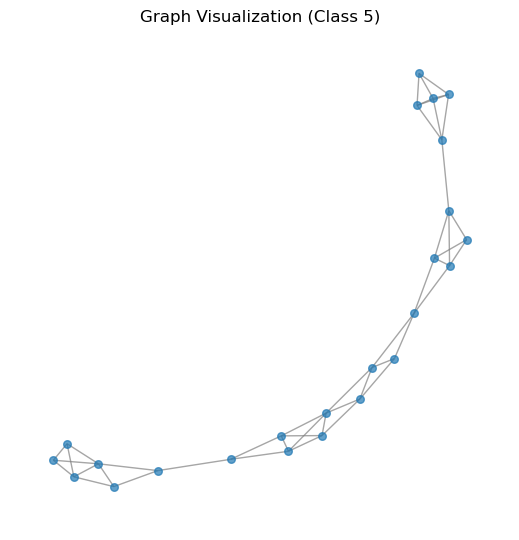

In [2]:
# Function to visualize a sample graph
def plot_graph(data):
    """Visualizes a graph using NetworkX."""
    edge_index = data.edge_index.numpy()
    graph = nx.Graph()
    graph.add_edges_from(edge_index.T)

    plt.figure(figsize=(5, 5))
    nx.draw(graph, node_size=30, edge_color="gray", alpha=0.7, with_labels=False)
    plt.title(f"Graph Visualization (Class {data.y.item()})")
    plt.show()

# Plot the first graph
plot_graph(dataset[3])


Attempt1: DVNE <br>
A Deep Variational Network Embedding (DVNE) is a Variational Graph Autoencoder (VGAE), which:<br>

Learns probabilistic latent representations instead of deterministic embeddings. <br>
Uses a reparameterization trick to sample embeddings from a Gaussian distribution.<br>
Helps capture uncertainty in graph representations.

In [44]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch_geometric.nn import GCNConv, global_mean_pool, global_max_pool
# from torch_geometric.data import Data
# import torch.distributions as dist

# class DVNE_Encoder(torch.nn.Module):
#     def __init__(self, in_channels, hidden_dim, latent_dim):
#         super(DVNE_Encoder, self).__init__()
#         self.conv1 = GCNConv(in_channels, hidden_dim)
#         self.conv_mu = GCNConv(hidden_dim, latent_dim)   # Mean embedding
#         self.conv_logvar = GCNConv(hidden_dim, latent_dim)  # Log variance embedding

#     def forward(self, x, edge_index, batch):
#         x = F.relu(self.conv1(x, edge_index))
#         mu = self.conv_mu(x, edge_index)  
#         logvar = self.conv_logvar(x, edge_index)  
        
#         # Pooling over graph
#         mu = global_max_pool(mu, batch)  
#         logvar = global_max_pool(logvar, batch)

#         # Ensure log variance stability
#         logvar = torch.clamp(logvar, min=-10, max=10)  # Clipping logvar to prevent numerical instability

#         return mu, logvar

#     def reparameterize(self, mu, logvar):
#         std = torch.exp(0.5 * logvar)  # Convert log variance to standard deviation
#         eps = torch.randn_like(std)  # Sample from standard normal
#         return mu + eps * std  # Reparametrize

# class DVNE_Decoder(torch.nn.Module):
#     def __init__(self, latent_dim):
#         super(DVNE_Decoder, self).__init__()
#         self.linear = nn.Linear(latent_dim, latent_dim)

#     def forward(self, z):
#         return torch.sigmoid(self.linear(z))

# # DVNE Loss: KL Divergence in Wasserstein Space
# '''
# Two parts: 
# First-order ranking loss (L1 norm) → Preserves pairwise relationships in the embedding space.
# Second-order reconstruction loss (L2 norm) → Ensures embeddings capture structure properly.
# '''
# def dvne_loss(mu, logvar, z, z_recon, margin=1.0, alpha=0.5):
#     """
#     Compute the DVNE loss.
#     - First-order ranking loss (L1 norm)
#     - Second-order L2 norm reconstruction loss
#     - KL Divergence in Wasserstein space
    
#     Arguments:
#     - mu: Mean of latent space
#     - logvar: Log variance of latent space
#     - z: Sampled embeddings from latent space (using reparameterization trick)
#     - z_recon: Reconstructed embeddings
#     - margin: Margin for ranking loss
#     - alpha: Weighting coefficient for L1 vs. L2 loss

#     Returns:
#     - Total loss (combined loss)
#     """

#     ### First-order Ranking Loss (L1 Norm)**
#     # Encourages pairwise distances in the embedding space to follow the data's structure.
#     pairwise_distances = torch.cdist(z, z, p=1)  # L1 distance between embeddings
#     ranking_loss = torch.clamp(margin - pairwise_distances, min=0).mean()

#     ### Second-order Reconstruction Loss (L2 Norm)**
#     # Ensures embeddings reconstruct input relationships correctly.
#     recon_loss = F.mse_loss(z_recon, z)  # L2 loss

#     ### KL Divergence in Wasserstein Space**
#     # Regularizes the latent space to match a normal prior.
#     prior_mu = torch.zeros_like(mu)
#     prior_logvar = torch.zeros_like(logvar)
    
#     kl_div = 0.5 * torch.sum(
#         torch.exp(logvar - prior_logvar) + (mu - prior_mu) ** 2 / torch.exp(prior_logvar) - 1 - (logvar - prior_logvar),
#         dim=1
#     ).mean()

#     ### **🔹 Final Loss Combination**
#     total_loss = alpha * ranking_loss + (1 - alpha) * recon_loss + 0.1 * kl_div

#     return total_loss, ranking_loss, recon_loss, kl_div



In [225]:
## USE GAT 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_max_pool
import torch.distributions as dist

class DVNE_Encoder(torch.nn.Module):
    def __init__(self, in_channels, hidden_dim, latent_dim, num_heads=4):
        super(DVNE_Encoder, self).__init__()
        
        # Change GCNConv to GATConv with multi-head attention
        self.conv1 = GATConv(in_channels, hidden_dim, heads=num_heads, concat=True)
        self.conv_mu = GATConv(hidden_dim * num_heads, latent_dim, heads=1, concat=False)   # Mean embedding
        self.conv_logvar = GATConv(hidden_dim * num_heads, latent_dim, heads=1, concat=False)  # Log variance embedding

    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))  # Apply GAT Conv (multi-head)
        mu = self.conv_mu(x, edge_index)  # Mean embedding
        logvar = self.conv_logvar(x, edge_index)  # Log variance embedding
        
        # Pooling over graph
        mu = global_max_pool(mu, batch)  # Max-pooling for the mean embedding
        logvar = global_max_pool(logvar, batch)  # Max-pooling for the log variance

        # Ensure log variance stability
        logvar = torch.clamp(logvar, min=-10, max=10)  # Clipping logvar to prevent numerical instability

        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)  # Convert log variance to standard deviation
        eps = torch.randn_like(std)  # Sample from standard normal
        return mu + eps * std  # Reparametrize

class DVNE_Decoder(torch.nn.Module):
    def __init__(self, latent_dim):
        super(DVNE_Decoder, self).__init__()
        self.linear = nn.Linear(latent_dim, latent_dim)

    def forward(self, z):
        return torch.sigmoid(self.linear(z))


def dvne_loss(mu, logvar, z, z_recon, alpha=0.6, beta=0.5):
    """
    Compute the DVNE loss.
    - First-order ranking loss (Cosine Similarity)
    - Second-order L1 + L2 reconstruction loss
    - KL Divergence in Wasserstein space
    """
    ### First-order Ranking Loss (Cosine Similarity)**
    norm_z = F.normalize(z, p=2, dim=1)  # Normalize embeddings
    cosine_sim = torch.mm(norm_z, norm_z.T)  # Compute cosine similarity matrix
    cosine_dist = 1 - cosine_sim  # Convert similarity to distance (higher = dissimilar)

    margin = torch.mean(cosine_dist) * 0.1  # Scale margin dynamically
    ranking_loss = torch.clamp(margin - cosine_dist, min=0).mean()

    ### Second-order Reconstruction Loss (L1 + L2 Loss)**
    recon_loss = 0.7 * F.mse_loss(z_recon, z) + 0.3 * F.l1_loss(z_recon, z)  # Weighted mix

    ### KL Divergence in Wasserstein Space**
    prior_mu = torch.zeros_like(mu)
    prior_logvar = torch.zeros_like(logvar)

    kl_div = 0.5 * torch.sum(
        torch.exp(logvar - prior_logvar) + (mu - prior_mu) ** 2 / torch.exp(prior_logvar) - 1 - (logvar - prior_logvar),
        dim=1
    ).mean()

    ### **Final Loss Combination**
    total_loss = alpha * ranking_loss + (1 - alpha) * recon_loss + beta * kl_div  # Increase KL weight

    return total_loss, ranking_loss, recon_loss, kl_div


# # DVNE Loss: KL Divergence in Wasserstein Space
# def dvne_loss(mu, logvar, z, z_recon, alpha=0.6, beta=0.5):
#     """
#     Compute the DVNE loss.
#     - First-order ranking loss (L1 norm)
#     - Second-order L2 norm reconstruction loss
#     - KL Divergence in Wasserstein space
#     """
#     ### First-order Ranking Loss (L1 Norm)**
#     pairwise_distances = torch.cdist(z, z, p=1)  # L1 distance between embeddings
#     margin = torch.mean(pairwise_distances) * 0.1
#     # print("torch.mean(pairwise_distances) * 0.1:", margin)
#     ranking_loss = torch.clamp(margin - pairwise_distances, min=0).mean()

#     ### Second-order Reconstruction Loss (L2 Norm)**
#     recon_loss = F.mse_loss(z_recon, z)  # L2 loss

#     ### KL Divergence in Wasserstein Space**
#     prior_mu = torch.zeros_like(mu)
#     prior_logvar = torch.zeros_like(logvar)
    
#     kl_div = 0.5 * torch.sum(
#         torch.exp(logvar - prior_logvar) + (mu - prior_mu) ** 2 / torch.exp(prior_logvar) - 1 - (logvar - prior_logvar),
#         dim=1
#     ).mean()

#     ### **Final Loss Combination**
#     total_loss = alpha * ranking_loss + (1 - alpha) * recon_loss + 0.1 * kl_div

#     return total_loss, ranking_loss, recon_loss, kl_div


In [226]:
def extract_dvne_embeddings(model, loader):
    model.eval()
    embeddings, labels = [], []
    with torch.no_grad():
        for data in loader:
            # data = data.to(device)
            _, _, _, z = model(data.x, data.edge_index, data.batch)
            embeddings.append(z.cpu())
            labels.append(data.y.cpu())
    return torch.cat(embeddings), torch.cat(labels)


In [227]:
from torch_geometric.data import DataLoader

# Split dataset
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [480, 120])

# Data Loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train graphs: {len(train_dataset)}, Test graphs: {len(test_dataset)}")

Train graphs: 480, Test graphs: 120


/Users/kinakim/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [228]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model
encoder = DVNE_Encoder(in_channels=dataset.num_features, hidden_dim=128, latent_dim=32)
decoder = DVNE_Decoder(latent_dim=32) #align with encoder

optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001)

# Training loop
for epoch in range(100):
    encoder.train()
    decoder.train()
    total_loss = 0
    total_ranking_loss = 0 
    total_recon_loss = 0 
    total_KL_div = 0 


    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()

        mu, logvar = encoder(data.x, data.edge_index, data.batch)
        z = encoder.reparameterize(mu, logvar)  # Sample embeddings

        reconstructed = decoder(z)  # Reconstruction (if needed)
        
        loss, ranking_loss, recon_loss, kl_div = dvne_loss(mu, logvar, z, reconstructed)  # Compute KL divergence in Wasserstein space
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_ranking_loss += ranking_loss.item()
        total_recon_loss += recon_loss.item() 
        total_KL_div += kl_div.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Ranking Loss: {total_ranking_loss:.4f}, Reconstruction Loss: {total_recon_loss:.4f}, KL Divergence: {total_KL_div:.4f}")


Epoch 1, Loss: 7.0687, Ranking Loss: 0.0452, Reconstruction Loss: 16.9314, KL Divergence: 0.5380
Epoch 2, Loss: 6.8106, Ranking Loss: 0.0455, Reconstruction Loss: 16.5223, KL Divergence: 0.3487
Epoch 3, Loss: 6.7240, Ranking Loss: 0.0455, Reconstruction Loss: 16.3797, KL Divergence: 0.2897
Epoch 4, Loss: 6.7511, Ranking Loss: 0.0454, Reconstruction Loss: 16.4346, KL Divergence: 0.3002
Epoch 5, Loss: 6.5843, Ranking Loss: 0.0452, Reconstruction Loss: 16.0371, KL Divergence: 0.2847
Epoch 6, Loss: 6.4366, Ranking Loss: 0.0454, Reconstruction Loss: 15.6872, KL Divergence: 0.2691
Epoch 7, Loss: 6.5518, Ranking Loss: 0.0453, Reconstruction Loss: 15.9648, KL Divergence: 0.2774
Epoch 8, Loss: 6.5098, Ranking Loss: 0.0455, Reconstruction Loss: 15.8679, KL Divergence: 0.2707
Epoch 9, Loss: 6.4280, Ranking Loss: 0.0453, Reconstruction Loss: 15.6523, KL Divergence: 0.2799
Epoch 10, Loss: 6.4275, Ranking Loss: 0.0454, Reconstruction Loss: 15.6739, KL Divergence: 0.2614
Epoch 11, Loss: 6.3516, Ranki

In [229]:
def extract_dvne_embeddings(encoder, loader):
    encoder.eval()
    embeddings, labels = [], []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            mu, logvar = encoder(data.x, data.edge_index, data.batch)  # Get mu and logvar
            z = encoder.reparameterize(mu, logvar)  # Sample latent embedding
            embeddings.append(z.cpu())
            labels.append(data.y.cpu())
    
    return torch.cat(embeddings), torch.cat(labels)

# Extract embeddings
train_embeddings, train_labels = extract_dvne_embeddings(encoder, train_loader)
test_embeddings, test_labels = extract_dvne_embeddings(encoder, test_loader)

print(f"Train embeddings shape: {train_embeddings.shape}")
print(f"Test embeddings shape: {test_embeddings.shape}")

Train embeddings shape: torch.Size([480, 32])
Test embeddings shape: torch.Size([120, 32])


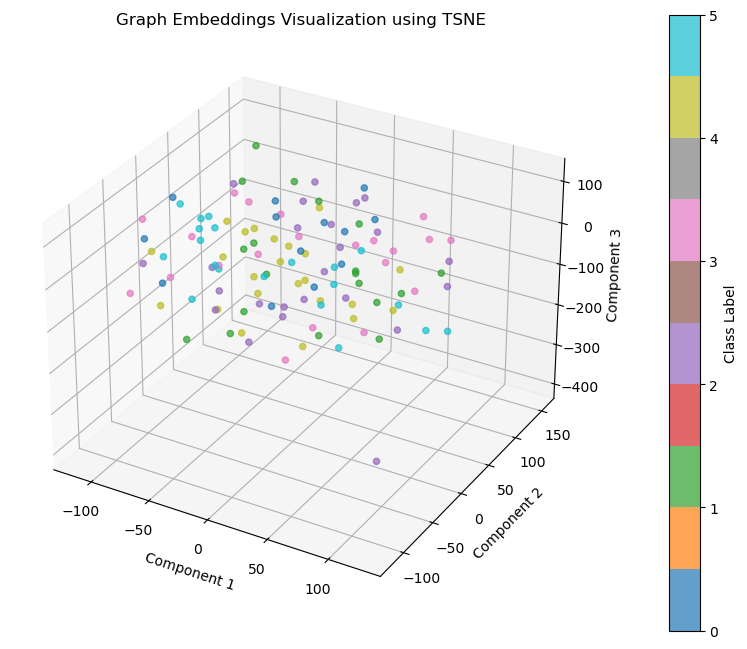

In [230]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

def visualize_embeddings_3d(embeddings, labels, method="tsne"):
    num_classes = len(set(labels.numpy()))  # Get number of unique classes

    # Reduce dimensionality
    if method == "tsne":
        reducer = TSNE(n_components=3, perplexity=30, random_state=42)
    else:
        reducer = PCA(n_components=3)

    reduced_embeddings = reducer.fit_transform(embeddings.numpy())

    # Create a 3D figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')  # 3D axis

    # Convert labels to an integer array for color mapping
    unique_labels = np.unique(labels.numpy())
    color_mapping = {label: i for i, label in enumerate(unique_labels)}
    mapped_colors = np.array([color_mapping[label] for label in labels.numpy()])

    # Scatter plot
    scatter = ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2], 
                         c=mapped_colors, cmap="tab10", alpha=0.7)

    # Labels and title
    ax.set_title(f"Graph Embeddings Visualization using {method.upper()}", fontsize=12)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")

    # Add color legend
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label("Class Label")

    plt.show()

# Visualize 3D embeddings
visualize_embeddings_3d(test_embeddings, test_labels, method="tsne")


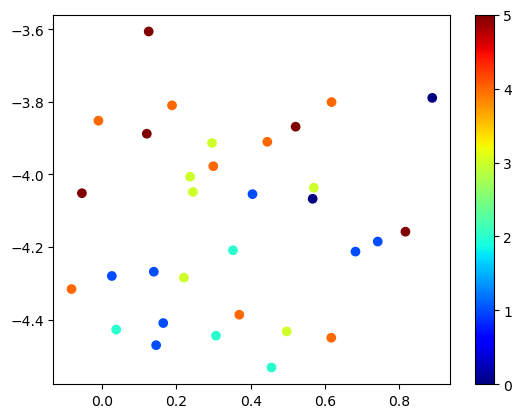

In [231]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming embeddings are stored in 'z'
tsne = TSNE(n_components=2)
z_2d = tsne.fit_transform(z.detach().cpu().numpy())

plt.scatter(z_2d[:, 0], z_2d[:, 1], c=data.y.cpu(), cmap='jet')
plt.colorbar()
plt.show()


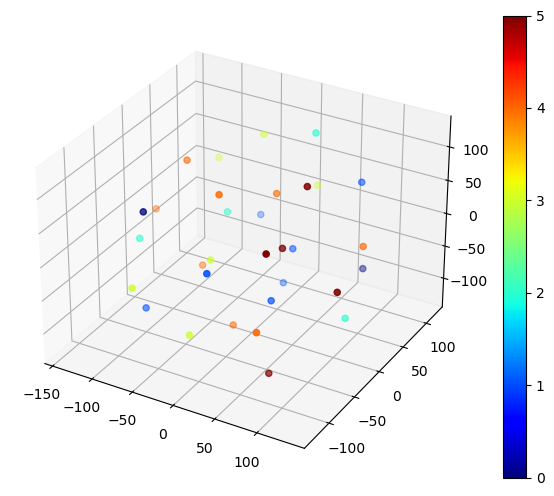

In [237]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Assuming embeddings are stored in 'z'
tsne = TSNE(n_components=3)
z_3d = tsne.fit_transform(z.detach().cpu().numpy())

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(z_3d[:, 0], z_3d[:, 1], z_3d[:, 2], c=data.y.cpu(), cmap='jet')

# Add color bar
plt.colorbar(sc)
plt.show()

In [235]:
## Classifier on Latent Representations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train logistic regression on learned embeddings
clf = LogisticRegression(max_iter=1000)
clf.fit(train_embeddings.numpy(), train_labels.numpy())

# Evaluate classifier
preds = clf.predict(test_embeddings.numpy())
accuracy = accuracy_score(test_labels.numpy(), preds)

print(f"Graph Classification Accuracy: {accuracy:.4f}")

pairs = list(zip(test_labels.numpy().tolist(), preds.tolist()))
print(pairs)


Graph Classification Accuracy: 0.1833
[(4, 4), (0, 4), (4, 4), (3, 1), (1, 5), (4, 5), (3, 4), (0, 3), (3, 3), (3, 0), (5, 5), (2, 1), (0, 0), (3, 0), (1, 0), (1, 0), (5, 3), (2, 4), (2, 1), (0, 1), (2, 3), (4, 5), (4, 5), (4, 3), (4, 4), (2, 1), (2, 0), (1, 3), (1, 4), (5, 1), (2, 0), (3, 0), (3, 4), (1, 1), (5, 5), (5, 2), (5, 2), (1, 2), (3, 4), (5, 4), (0, 4), (1, 2), (5, 1), (5, 3), (5, 1), (2, 4), (4, 3), (4, 1), (2, 1), (2, 2), (0, 4), (2, 2), (1, 3), (4, 4), (4, 0), (2, 1), (5, 4), (5, 2), (4, 0), (1, 5), (2, 4), (3, 5), (3, 4), (3, 2), (3, 0), (1, 0), (3, 0), (3, 5), (0, 4), (3, 3), (1, 0), (2, 1), (0, 2), (5, 4), (3, 4), (1, 3), (5, 5), (1, 4), (2, 4), (2, 0), (2, 3), (4, 5), (2, 1), (1, 1), (5, 1), (4, 4), (2, 4), (0, 5), (4, 3), (2, 1), (2, 0), (0, 4), (4, 0), (4, 3), (1, 3), (3, 4), (4, 4), (0, 1), (0, 3), (5, 1), (4, 4), (4, 5), (2, 2), (3, 3), (1, 0), (5, 5), (5, 2), (3, 3), (1, 5), (4, 5), (2, 5), (5, 0), (3, 3), (1, 4), (2, 3), (4, 0), (4, 0), (3, 4), (0, 3), (5, 0)]


In [238]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(train_embeddings.numpy(), train_labels.numpy())
nb_preds = nb_clf.predict(test_embeddings.numpy())
nb_accuracy = accuracy_score(test_labels.numpy(), nb_preds)
print(f"Naïve Bayes Accuracy: {nb_accuracy:.4f}")

# Linear Discriminant Analysis (LDA)
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(train_embeddings.numpy(), train_labels.numpy())
lda_preds = lda_clf.predict(test_embeddings.numpy())
lda_accuracy = accuracy_score(test_labels.numpy(), lda_preds)
print(f"LDA Accuracy: {lda_accuracy:.4f}")

# Support Vector Machine (SVM)
svm_clf = SVC(kernel='linear')  # You can change 'linear' to 'rbf' for a non-linear model
svm_clf.fit(train_embeddings.numpy(), train_labels.numpy())
svm_preds = svm_clf.predict(test_embeddings.numpy())
svm_accuracy = accuracy_score(test_labels.numpy(), svm_preds)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Output predictions as (true_label, predicted_label) pairs for each model
nb_pairs = list(zip(test_labels.numpy().tolist(), nb_preds.tolist()))
lda_pairs = list(zip(test_labels.numpy().tolist(), lda_preds.tolist()))
svm_pairs = list(zip(test_labels.numpy().tolist(), svm_preds.tolist()))

print("Naïve Bayes Pairs:", nb_pairs)
print("LDA Pairs:", lda_pairs)
print("SVM Pairs:", svm_pairs)


Naïve Bayes Accuracy: 0.1333
LDA Accuracy: 0.1833
SVM Accuracy: 0.1833
Naïve Bayes Pairs: [(4, 3), (0, 3), (4, 0), (3, 1), (1, 5), (4, 2), (3, 1), (0, 5), (3, 4), (3, 0), (5, 0), (2, 3), (0, 0), (3, 0), (1, 0), (1, 0), (5, 3), (2, 4), (2, 1), (0, 1), (2, 3), (4, 5), (4, 5), (4, 3), (4, 4), (2, 1), (2, 0), (1, 0), (1, 3), (5, 3), (2, 0), (3, 5), (3, 4), (1, 4), (5, 5), (5, 2), (5, 1), (1, 5), (3, 4), (5, 4), (0, 4), (1, 0), (5, 3), (5, 2), (5, 1), (2, 0), (4, 2), (4, 4), (2, 1), (2, 1), (0, 3), (2, 1), (1, 0), (4, 0), (4, 0), (2, 5), (5, 3), (5, 4), (4, 0), (1, 4), (2, 3), (3, 5), (3, 4), (3, 2), (3, 0), (1, 0), (3, 0), (3, 1), (0, 1), (3, 3), (1, 0), (2, 0), (0, 3), (5, 0), (3, 2), (1, 2), (5, 2), (1, 4), (2, 1), (2, 0), (2, 3), (4, 5), (2, 2), (1, 2), (5, 3), (4, 4), (2, 1), (0, 1), (4, 3), (2, 2), (2, 0), (0, 4), (4, 3), (4, 3), (1, 1), (3, 3), (4, 4), (0, 0), (0, 3), (5, 1), (4, 2), (4, 1), (2, 2), (3, 1), (1, 0), (5, 5), (5, 0), (3, 3), (1, 5), (4, 5), (2, 5), (5, 0), (3, 2), (1, 0

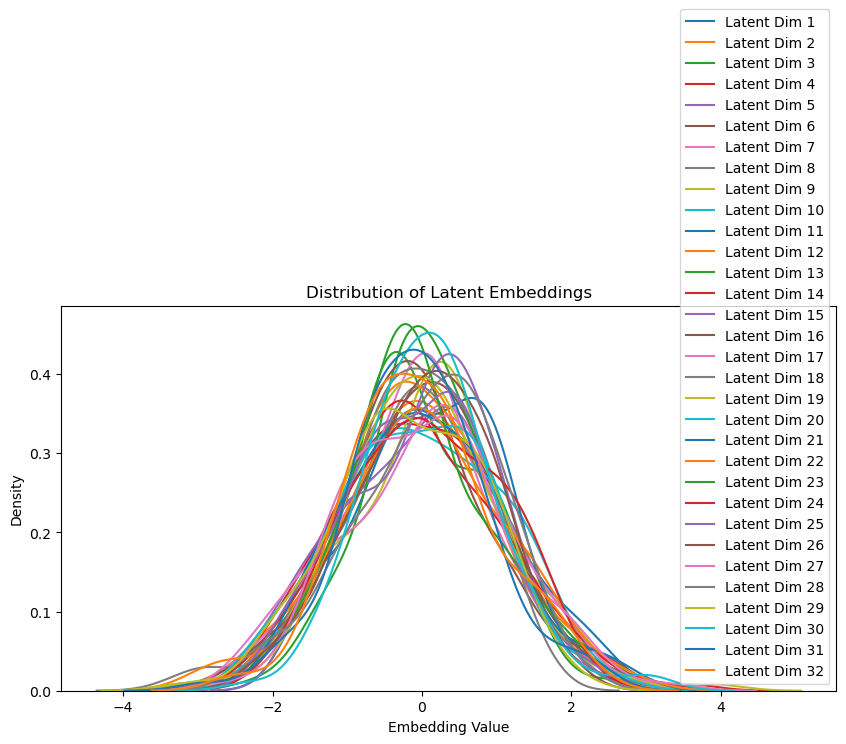

In [236]:

import torch
import seaborn as sns
import matplotlib.pyplot as plt

def plot_embedding_distribution(embeddings):
    embeddings = embeddings.numpy()
    plt.figure(figsize=(10, 5))
    
    # Plot histogram for each latent dimension
    for i in range(embeddings.shape[1]):
        sns.kdeplot(embeddings[:, i], label=f"Latent Dim {i+1}")
    
    plt.title("Distribution of Latent Embeddings")
    plt.xlabel("Embedding Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

plot_embedding_distribution(test_embeddings)


'''
2. Given all the loss, what do you think is the problem? How can I improve the model?
Looking at the loss components, here are some potential problems and improvement suggestions:

1. High Reconstruction Loss
Problem: The reconstruction loss (L2 norm) seems to be quite high compared to the other losses, even though it should be helping the embeddings to capture structure. A high reconstruction loss suggests that the model is struggling to map the latent variables back to a meaningful representation of the input graph data.
Solution: The high reconstruction loss could be a sign of overfitting or instability. Try the following:
Regularization: Apply dropout to both the encoder and decoder layers to avoid overfitting. You could also use weight decay in the optimizer.
Decoder refinement: Check if the decoder needs a more sophisticated architecture. If the decoder is too simple (a single linear layer), it might not be sufficient to effectively reconstruct meaningful graph features.
Learning rate adjustment: Try to lower the learning rate slightly, as high reconstruction loss can sometimes be caused by large updates at each step.
2. KL Divergence is significant
Problem: The KL divergence is still noticeable throughout the training, which could indicate that your model is struggling to learn a meaningful latent space distribution.
Solution: The model may be failing to regularize the latent space properly. Consider the following:
KL annealing: Use a gradually increased weight for the KL divergence loss (starting small and increasing it over epochs). This can allow the model to first focus on learning good representations and only later on regularizing the latent space.
Prior distribution: Double-check if your prior mean and log variance (set to zeros) are appropriate. If necessary, you could experiment with different priors.
3. Ranking Loss Behavior
As mentioned, the ranking loss is not changing, which is a concern. This could indicate that your embeddings aren't differing much, preventing any real optimization in the pairwise relationships.
Solution: In addition to the previous suggestions (e.g., reducing the margin), consider:
Enhanced attention in GAT: Since you're using GAT layers instead of GCN, experiment with different attention mechanisms (e.g., using multi-head attention). This could potentially capture more useful relational information.
Edge importance: In graph attention networks, edges have weights that represent their importance. Experiment with different ways of learning edge importance, as this may help improve your ranking loss.
4. Batch Size & Learning Dynamics
Problem: Your batch size and optimizer settings could influence the loss dynamics. A large batch size can lead to slow updates, while a small batch size might introduce noise.
Solution: Try adjusting the batch size to see how the loss dynamics change. Additionally, consider adaptive optimizers like AdamW, which can help better regularize the learning process.
5. Hyperparameter Tuning
The issue could also stem from hyperparameters like hidden dimensions, latent dimensions, and attention heads in your GAT layers.
Solution: Experiment with tuning the hidden dimensions or latent space size. Make sure the latent space is large enough to capture meaningful relationships but not too large, as it could overfit or complicate training.
'''